In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas packages
import numpy as np
import pandas as pd

In [3]:
# Import the seaborn and matplotlib packages
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [5]:
from imblearn.over_sampling import SMOTE

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [7]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [8]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [9]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
from collections import OrderedDict

In [13]:
from itertools import islice


Note the code was written in following platform :
OS : Windows 10 Home Processor : Intel Core i3 Processor @2.4 GHz

File for doing analysis of Country Data Set :
Name of the CSV File for doing analysis of Country Data Set is : Leads.csv

In [14]:
pd.set_option('display.max_columns', 200)  
pd.set_option('display.max_rows', 200)  

In [15]:
# Read the file for doing analysis of telecom_churn_data  :
telecom_df = pd.read_csv('telecom_churn_data.csv')

In [16]:
# Shape of telecom_df:
telecom_df.shape

(99999, 226)

In [17]:
# Describe telecom_df
telecom_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,...,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,9

In [18]:
#Get Info for telecom_df
telecom_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [19]:
#Get top rows from telecom_df
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,...,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.3

In [20]:
# Check out the percentage of NAN Values in each column in telecom_df
round(telecom_df.isnull().sum() / len(telecom_df) *100,2) 

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

# Data Preparation:
We will use the usage-based definition to define churn.

We need to predict churn only for the high-value customers. 

We can Define high-value customers as follows: 

Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

# Creation Of New Features:

1. Total Amount in Good Phase:
We define total Recharge Amount in good phase as the mean of Total Recharge Amount in month 6 and Total Recharge Amount in month 7

In [21]:
telecom_df['total_rech_amt_good_phase'] = (telecom_df['total_rech_amt_6'] + telecom_df['total_rech_amt_7'])/2

2. Total Usage Column

In [22]:
telecom_df['total_usage_col'] = telecom_df['total_og_mou_9'] + telecom_df['total_ic_mou_9'] + telecom_df['vol_2g_mb_9'] + telecom_df['vol_3g_mb_9']

In [23]:
# Create A New Data Frame to be used for filtering high-value customers :
telecom_high_value = telecom_df

In [24]:
# Filter out High-Value Customers :

telecom_high_value = telecom_high_value[telecom_high_value['total_rech_amt_good_phase'] > telecom_high_value['total_rech_amt_good_phase'].quantile(0.70)]



# Creation Of Target Variable Chrun based on the total usage column :

In [25]:
# Create Target Variable Chrun based on the total usage column :

telecom_high_value['churn'] = np.where(telecom_high_value['total_usage_col']== 0, 1, 0)

telecom_high_value['churn'].value_counts()

0    27390
1     2589
Name: churn, dtype: int64

In [26]:
# Drop the columns total_rech_amt_good_phase and total_usage_col after we identified churn and not churned customers:
telecom_high_value = telecom_high_value.drop(['total_rech_amt_good_phase','total_usage_col'],1)

# Dropping Variables in the 9th month after the churn indicator creation

In [27]:
# Dropping Variables in the 9th month after the churn indicator creation

nine_month_col = [col for col in telecom_high_value.columns if '_9' in col]

nine_month_col

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [28]:
# Drop th3 9 month columns:
telecom_high_value = telecom_high_value.drop(nine_month_col, axis = 1)

telecom_high_value.shape

(29979, 173)

In [29]:
# Drop sep_vbc_3g column :

telecom_high_value = telecom_high_value.drop('sep_vbc_3g', axis=1)

In [30]:
# Checking Churn Rate Percentage:
chrun = telecom_high_value['churn']

churn_percent = (sum(chrun)/len(chrun.index))*100

churn_percent

8.636045231662164

# Conclusion from Churn Percentage in the Data Set:
We have 8.63 as the churn percentage which is clearly imbalanced and hence we need to balance out the data for doing further analysis.

In [31]:
# Describe telecom_high_value
telecom_high_value.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,2.997900e+04,29979.0,29865.0,29865.0,29865.0,29979.000000,29979.000000,29979.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.00000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.00000,29041.000000,29663.0,29676.0,29041.0,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29979.000000,29979.000000,29979.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29663.0,29676.0,29041.0,29663.000000,29676.000000,29041.000000,29979.000000,29979.000000,29979.000000,29663.000000,29676.000000,29041.00000,29663.000000,29676.000000,29041.000000,29663.000000,29676.000000,29041.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,11387.000000,11652.000000,11741.000000,11387.000000,11652.000000,11741.000000,11387.000000,11652.000000,11741.000000,11387.000000,11652.000000,11741.000000,11387.000000,11652.000000,11741.000000,29979.000000,29979.000000,299

In [32]:
telecom_high_value.shape

(29979, 172)

In [33]:
telecom_high_value['last_date_of_month_6'].describe()

count         29979
unique            1
top       6/30/2014
freq          29979
Name: last_date_of_month_6, dtype: object

In [34]:
telecom_high_value['last_date_of_month_7'].describe()

count         29948
unique            1
top       7/31/2014
freq          29948
Name: last_date_of_month_7, dtype: object

In [35]:
telecom_high_value['last_date_of_month_8'].describe()

count         29822
unique            1
top       8/31/2014
freq          29822
Name: last_date_of_month_8, dtype: object

# Drop columns where we have no variance :
Following columns have no variance and hence will be dropped :
1. circle_id
2. loc_og_t2o_mou
3. std_og_t2o_mou
4. loc_ic_t2o_mou
5. std_og_t2c_mou_6
6. std_og_t2c_mou_7
7. std_og_t2c_mou_8
8. std_ic_t2o_mou_6
9. std_ic_t2o_mou_7
10. std_ic_t2o_mou_8
11. last_date_of_month_6
12. last_date_of_month_7
13. last_date_of_month_8


In [36]:
telecom_high_value = telecom_high_value.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6',
                     'std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
                   'std_ic_t2o_mou_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'], 1)

In [37]:
# Dropping columns for months 6th, 7th and 8th :
drop_columns= ['fb_user','night_pck_user','arpu_2g','arpu_3g','av_rech_amt_data','count_rech_3g',
'count_rech_2g','max_rech_data','total_rech_data','date_of_last_rech_data']

for field in drop_columns:
    for month in ['6', '7', '8']:
        column = field + '_' + month
        telecom_high_value = telecom_high_value.drop([column], 1)

In [38]:
telecom_high_value.shape

(29979, 129)

In [39]:
# Check out the percentage of NAN Values in each column in telecom_high_value
round(telecom_high_value.isnull().sum() / len(telecom_high_value) *100,2) 

mobile_number          0.00
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
onnet_mou_6            1.05
onnet_mou_7            1.01
onnet_mou_8            3.13
offnet_mou_6           1.05
offnet_mou_7           1.01
offnet_mou_8           3.13
roam_ic_mou_6          1.05
roam_ic_mou_7          1.01
roam_ic_mou_8          3.13
roam_og_mou_6          1.05
roam_og_mou_7          1.01
roam_og_mou_8          3.13
loc_og_t2t_mou_6       1.05
loc_og_t2t_mou_7       1.01
loc_og_t2t_mou_8       3.13
loc_og_t2m_mou_6       1.05
loc_og_t2m_mou_7       1.01
loc_og_t2m_mou_8       3.13
loc_og_t2f_mou_6       1.05
loc_og_t2f_mou_7       1.01
loc_og_t2f_mou_8       3.13
loc_og_t2c_mou_6       1.05
loc_og_t2c_mou_7       1.01
loc_og_t2c_mou_8       3.13
loc_og_mou_6           1.05
loc_og_mou_7           1.01
loc_og_mou_8           3.13
std_og_t2t_mou_6       1.05
std_og_t2t_mou_7       1.01
std_og_t2t_mou_8       3.13
std_og_t2m_mou_6       1.05
std_og_t2m_mou_7    

# Imputing Missing Values for Columns:
We have very columns with missing values percentage less than or equal to 3.13. We will start with imputing missing values for these columns.

In [40]:
# Imputing Values of date_of_last_rech_6, date_of_last_rech_7 and date_of_last_rech_8 using Mode
telecom_high_value['date_of_last_rech_6'].fillna(telecom_high_value['date_of_last_rech_6'].mode()[0], inplace=True)
telecom_high_value['date_of_last_rech_7'].fillna(telecom_high_value['date_of_last_rech_7'].mode()[0], inplace=True)
telecom_high_value['date_of_last_rech_8'].fillna(telecom_high_value['date_of_last_rech_8'].mode()[0], inplace=True)

In [41]:
# Convert Values for date_of_last_rech_6, date_of_last_rech_7 and date_of_last_rech_8 to Days:
telecom_high_value['date_of_last_rech_6'] = pd.to_datetime(telecom_high_value.date_of_last_rech_6).dt.day
telecom_high_value['date_of_last_rech_7'] = pd.to_datetime(telecom_high_value.date_of_last_rech_7).dt.day
telecom_high_value['date_of_last_rech_8'] = pd.to_datetime(telecom_high_value.date_of_last_rech_8).dt.day

In [42]:
# Impute Missing Values Using Median:
missing_columns = telecom_high_value.columns[telecom_high_value.isnull().sum()>0]
for column in missing_columns:
    telecom_high_value[column].fillna((telecom_high_value[column].median()), inplace=True)

In [43]:
# Check out the percentage of NAN Values in each column in telecom_high_value
round(telecom_high_value.isnull().sum() / len(telecom_high_value) *100,2) 

mobile_number          0.0
arpu_6                 0.0
arpu_7                 0.0
arpu_8                 0.0
onnet_mou_6            0.0
onnet_mou_7            0.0
onnet_mou_8            0.0
offnet_mou_6           0.0
offnet_mou_7           0.0
offnet_mou_8           0.0
roam_ic_mou_6          0.0
roam_ic_mou_7          0.0
roam_ic_mou_8          0.0
roam_og_mou_6          0.0
roam_og_mou_7          0.0
roam_og_mou_8          0.0
loc_og_t2t_mou_6       0.0
loc_og_t2t_mou_7       0.0
loc_og_t2t_mou_8       0.0
loc_og_t2m_mou_6       0.0
loc_og_t2m_mou_7       0.0
loc_og_t2m_mou_8       0.0
loc_og_t2f_mou_6       0.0
loc_og_t2f_mou_7       0.0
loc_og_t2f_mou_8       0.0
loc_og_t2c_mou_6       0.0
loc_og_t2c_mou_7       0.0
loc_og_t2c_mou_8       0.0
loc_og_mou_6           0.0
loc_og_mou_7           0.0
loc_og_mou_8           0.0
std_og_t2t_mou_6       0.0
std_og_t2t_mou_7       0.0
std_og_t2t_mou_8       0.0
std_og_t2m_mou_6       0.0
std_og_t2m_mou_7       0.0
std_og_t2m_mou_8       0.0
s

# Missing Values Imputed:
As all the missing Values have been imputed, we are good to proceed with the data analysis

In [44]:
# Outlier Treatment :

telecom_high_value.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,2.997900e+04,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,7.001223e+09,587.587624,589.424681,535.067748,297.590611,305.886840,271.137938,421.142281,426.990330,383.029940,17.428073,13.535270,13.263074,29.348362,22.056425,21.483542,95.084989,96.129949,88.149189,182.428031,182.396339,170.618259,6.983204,7.104696,6.505787,1.567723,1.86379,1.714052,284.845600,285.973285,266.230021,190.036338,200.206205,172.600535,203.627289,213.913436,180.518823,2.012068,2.035893,1.790935,396.504945,417.016438,356.472052,2.266842

# Handling Outlier Values:

In [45]:
# Create a list to be used for checking outliers in all columns except churn and mobile number:
outlier_columns = [col for col in telecom_high_value.columns if col not in ['churn','mobile_number']]

In [46]:
for col in outlier_columns:
    percentiles = telecom_high_value[col].quantile([0.01,0.99]).values
    telecom_high_value[col][telecom_high_value[col] <= percentiles[0]] = percentiles[0]
    telecom_high_value[col][telecom_high_value[col] >= percentiles[1]] = percentiles[1]

# Creation Of New Features:
1. Create new feature to identify the internet usage using the Median value of Internet usage (2G + 3G) across months to capture the churn rate as it was observed majority of the churn happens when the internet usage pattern shows a decline
2. The AON variable was used to create tenure buckets.  It was observed larger the tenure, lesser was the churn - as customers who are newly acquired to the network churned more as compared to the old customers.

In [47]:
telecom_high_value['int_usage_median'] = telecom_high_value[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']].median(axis=1)
telecom_high_value['int_usage_median'] = telecom_high_value.int_usage_median.map(lambda x: 1 if x == 0 else 0)
telecom_high_value = telecom_high_value.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'], 1)

In [48]:
telecom_high_value['tenure_buck'] = np.round(telecom_high_value['aon']/365,1)
bins = [0, 1, 2, 3, 4, 10]
telecom_high_value['tenure_buck'] = pd.cut(telecom_high_value['tenure_buck'], bins)
telecom_high_value['tenure_buck'].value_counts()

(4, 10]    9681
(1, 2]     7486
(0, 1]     5320
(2, 3]     4530
(3, 4]     2962
Name: tenure_buck, dtype: int64

In [49]:
# Rename Tenure Buck:
telecom_high_value.rename(columns={"tenure_buck_(1, 2]": "tenure_buck_1_to_2","tenure_buck_(2, 3]":"tenure_buck_2_to_3",
                   "tenure_buck_(3, 4]":"tenure_buck_3_to_4",
                   "tenure_buck_(4, 10]":"tenure_buck_4_to_10"}, inplace=True)

In [50]:
telecom_high_value.shape

(29979, 125)

In [51]:
telecom_high_value.corr()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,int_usage_median
mobile_number,1.000000,0.016440,0.012380,0.026671,-0.012177,-0.015367,-0.011652,0.000894,-0.011396,0.002707,0.009677,0.004027,0.009339,-0.000959,0.001932,0.000291,0.058595,0.057428,0.057465,0.087311,0.081242,0.084380,0.078461,0.077101,0.075589,-0.014147,-0.023699,-0.016182,0.089779,0.086237,0.086423,-0.040192,-0.042144,-0.035352,-0.052469,-0.057909,-0.049152,0.038831,0.035130,0.039483,-0.060324,-0.066278,-0.054332,-0.000728,0.004661,0.000158,-0.034720,-0.037237,-0.032502,-0.022013,NaN,NaN,-0.006089,-0.016723,-0.002662,0.051243,0.047402,0.050457,0.078583,0.069431,0.072998,0.070329,0.069428,0.072364,0.080029,0.073523,0.074705,-0.017238,-0.009916,-0.016099,-0.022866,-0.026897,-0.023327,0.036330,0.027464,0.033689,-0.021589,-0.021980,-0.019883,0.063015,0.056600,0.059333,-0.025448,-0.011897,-0.039137,0.014850,0.013792,0.010947,0.028129,0.018347,0.017604,-0.051739,-0.060830,-0.051683,0.015821,0.015906,0.024503,0.065163,0.061200,0.065249,-0.039158,-0.008954,-0.017680,0.054271,0.057414,0.056716,0.016410,0.016054,0.014298,-0.019040,-0.016973,-0.010047,0.003161,0.002402,0.014148,-0.019598,-0.013114,-0.015732,0.315538,-0.024034,-0.023497,-0.035517,-0.039227,-0.001817
arpu_6,0.016440,1.000000,0.515676,0.425558,0.359917,0.174450,0.143094,0.536296,0.288464,0.252087,0.127644,0.093896,0.106279,0.176462,0.123062,0.129056,0.193111,0.136020,0.126349,0.343558,0.228788,0.210179,0.149384,0.106407,0.099349,0.082372,0.006727,0.009207,0.351039,0.240924,0.217019,0.275593,0.108709,0.081827,0.319058,0.141999,0.109463,0.066566,0.040845,0.038146,0.413706,0.178984,0.133726,0.204398,0.115191,0.126238,0.142828,0.038597,0.035182,0.131940,NaN,NaN,0.607322,0.306919,0.241313,0.136484,0.091142,0.083081,0.208884,0.146895,0.131484,0.072909,0.050793,0.046334,0.206100,0.143192,0.128435,0.147844,0.078124,0.069207,0.139605,0.071847,0.064059,0.049519,0.032298,0.027290,0.163046,0.087073,0.077605,0.246025,0.154480,0.133539,0.023102,-0.075102,-0.019840,0.092692,0.049346,0.045444,0.061301,0.034657,0.036029,0.396495,0.110896,0.091453,0.927241,0.482305,0.414087,0.302725,0.177058,0.213849,0.160461,-0.012768,0.047335,0.224047,0.112068,0.148254,0.027300,-0.018512,-0.007164,0.009193,-0.031582,-0.032140,0.250047

# Creation Of Dummies For Tenure Buck:

In [52]:
#create dummy for tenure_buck 
telecom_high_value = pd.get_dummies(telecom_high_value, drop_first=True)

In [53]:
# Function to get rid of redundant pairs in Correlation
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to find the top correlation pairs for a given dataframe df
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [54]:
# View the Top 100 Correlation Pairs:
get_top_abs_correlations(telecom_high_value,100)

arpu_8            total_rech_amt_8       0.939481
arpu_6            total_rech_amt_6       0.927241
arpu_7            total_rech_amt_7       0.917529
loc_ic_mou_6      total_ic_mou_6         0.899343
loc_ic_mou_8      total_ic_mou_8         0.894929
loc_ic_mou_7      total_ic_mou_7         0.891387
loc_ic_t2m_mou_6  loc_ic_mou_6           0.887016
loc_ic_t2m_mou_8  loc_ic_mou_8           0.886137
aon               tenure_buck_(4, 10]    0.883717
loc_ic_t2m_mou_7  loc_ic_mou_7           0.877524
onnet_mou_8       std_og_t2t_mou_8       0.870443
std_ic_t2m_mou_8  std_ic_mou_8           0.867231
onnet_mou_7       std_og_t2t_mou_7       0.864749
std_ic_t2m_mou_7  std_ic_mou_7           0.864324
std_ic_t2m_mou_6  std_ic_mou_6           0.862700
onnet_mou_6       std_og_t2t_mou_6       0.856659
loc_ic_mou_7      loc_ic_mou_8           0.853013
loc_og_t2m_mou_8  loc_og_mou_8           0.846717
loc_og_mou_7      loc_og_mou_8           0.837096
loc_ic_t2m_mou_7  loc_ic_t2m_mou_8       0.836801


# Conclusion from Correlation Of Columns :
We found that in the top 100 correlation pairs all have strong correlation which is greater than 0.7, hence we will drop these pairs which have correlation greater than 0.7

In [55]:
corr_matrix = telecom_high_value.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [56]:
# Find index of feature columns with correlation greater than 0.7
correlation_cols = [column for column in upper.columns if any(upper[column] > 0.7)]
correlation_cols


['onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total

In [57]:
telecom_high_value = telecom_high_value.drop(correlation_cols, 1)

In [58]:
telecom_high_value.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 71 columns):
mobile_number          29979 non-null int64
arpu_6                 29979 non-null float64
arpu_7                 29979 non-null float64
arpu_8                 29979 non-null float64
onnet_mou_6            29979 non-null float64
offnet_mou_6           29979 non-null float64
offnet_mou_7           29979 non-null float64
roam_ic_mou_6          29979 non-null float64
roam_ic_mou_7          29979 non-null float64
roam_ic_mou_8          29979 non-null float64
loc_og_t2t_mou_6       29979 non-null float64
loc_og_t2m_mou_6       29979 non-null float64
loc_og_t2f_mou_6       29979 non-null float64
loc_og_t2c_mou_6       29979 non-null float64
loc_og_t2c_mou_7       29979 non-null float64
loc_og_t2c_mou_8       29979 non-null float64
std_og_t2f_mou_6       29979 non-null float64
std_og_t2f_mou_7       29979 non-null float64
std_og_t2f_mou_8       29979 non-null float64
isd_og_mou_6       

# Univariate Analysis Using Box Plot:

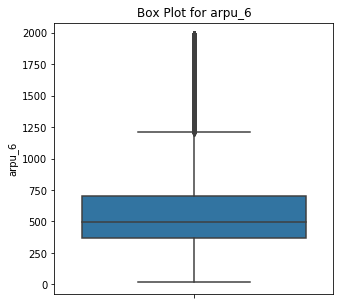

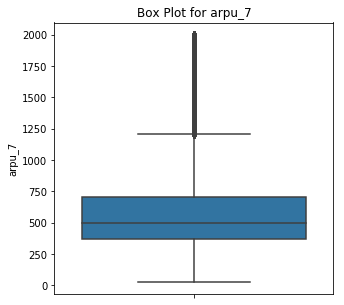

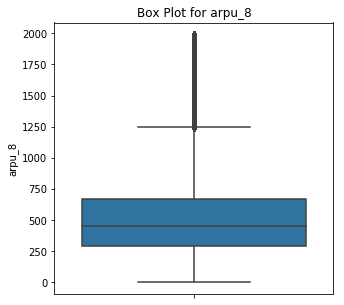

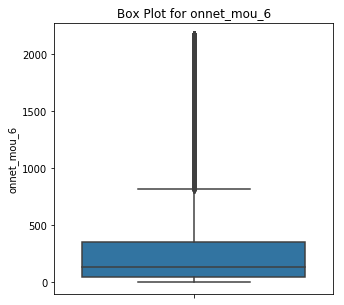

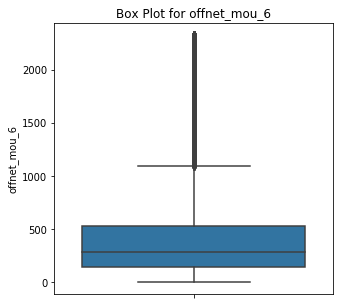

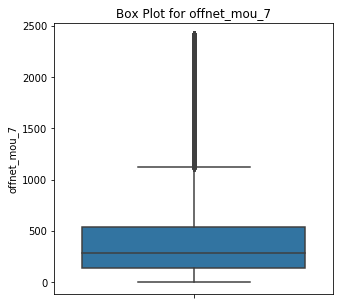

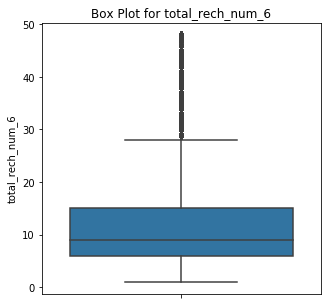

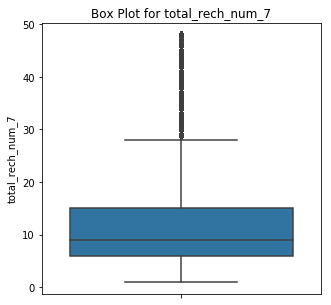

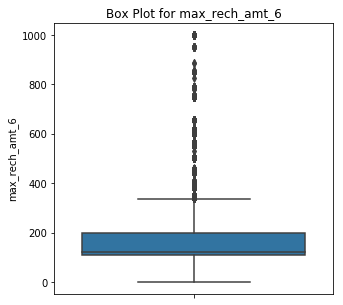

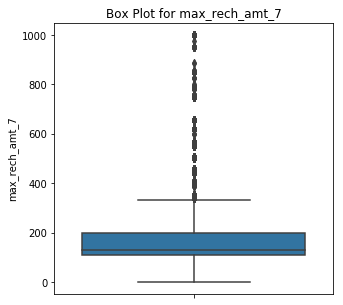

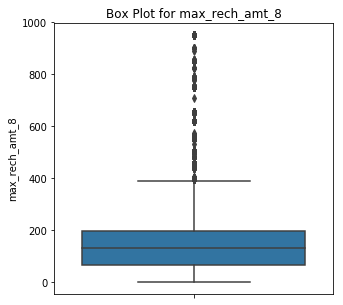

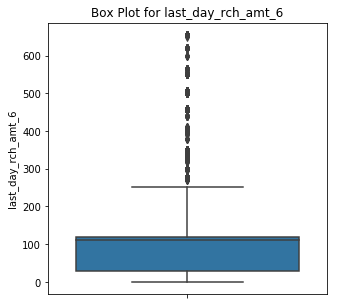

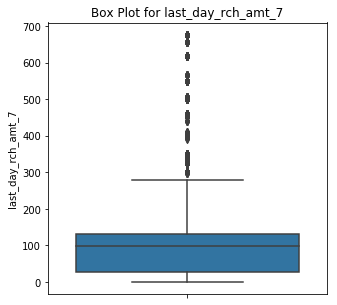

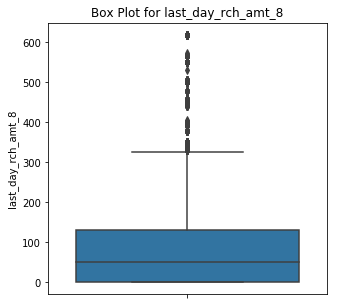

In [59]:
# Draw box plot to analyse the numeric columns :
numericColumns = [col for col in telecom_high_value.columns if col not in ['churn','mobile_number']]

numericColumns = ['arpu_6','arpu_7','arpu_8','onnet_mou_6',
                  'offnet_mou_6','offnet_mou_7','total_rech_num_6','total_rech_num_7',
                  'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8',
                  'last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8']
for col in numericColumns:
    plt.figure(figsize=(5, 5))
    plt.title("Box Plot for " + col)
    sns.boxplot(y=col, data=telecom_high_value)

We see a huge variation in the box plots for the following columns:
1. max_rech_amt_6
2. max_rech_amt_7
3. max_rech_amt_8
4. last_day_rch_amt_6
5. last_day_rch_amt_7
6. last_day_rch_amt_8

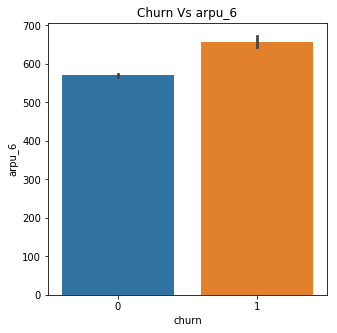

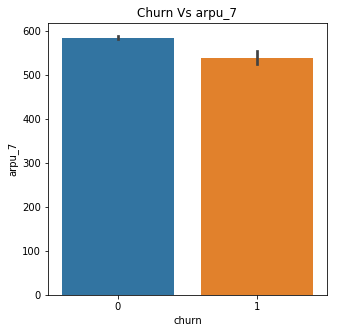

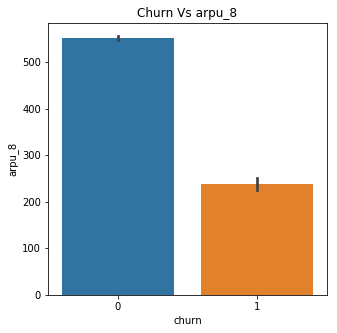

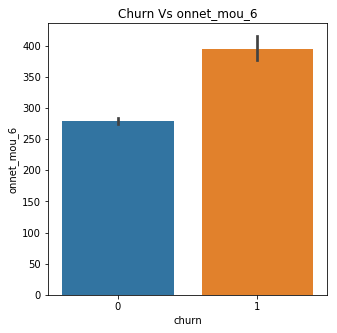

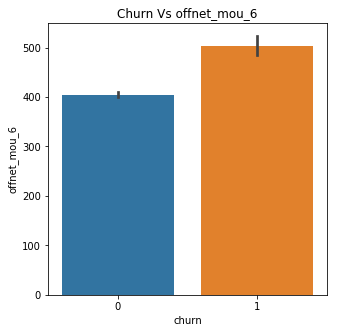

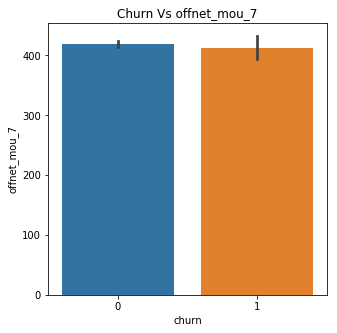

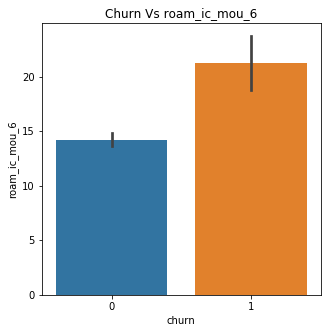

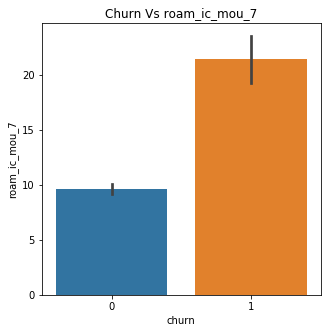

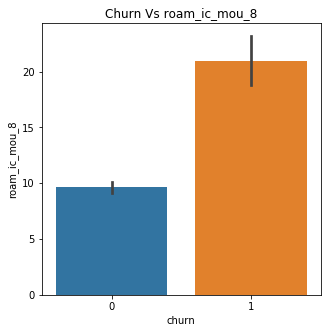

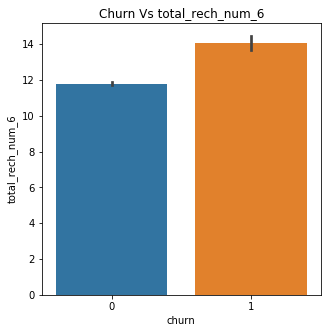

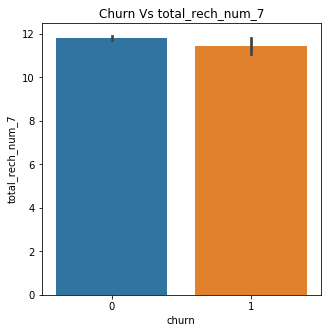

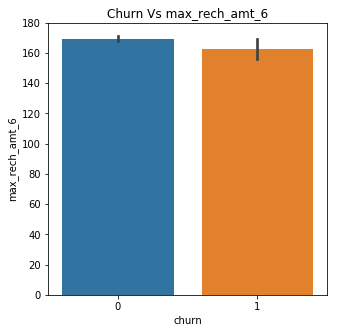

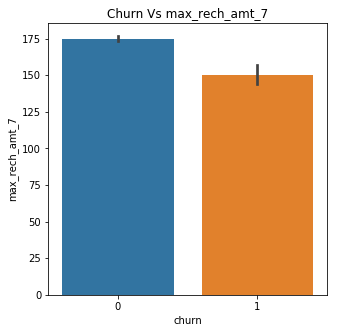

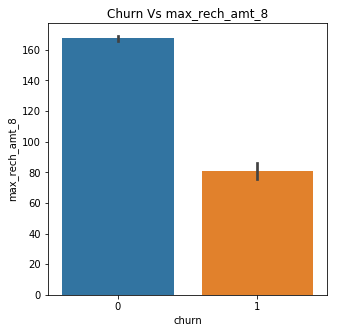

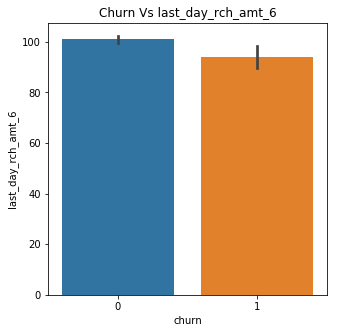

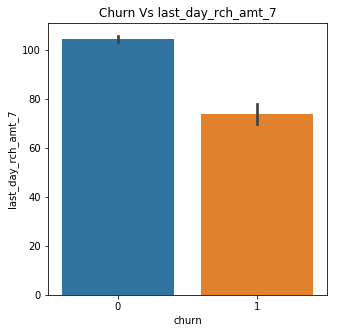

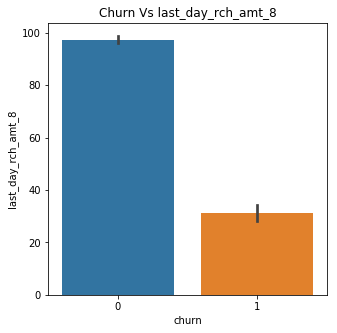

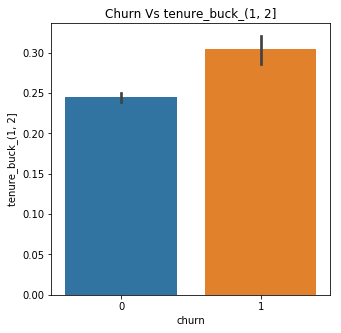

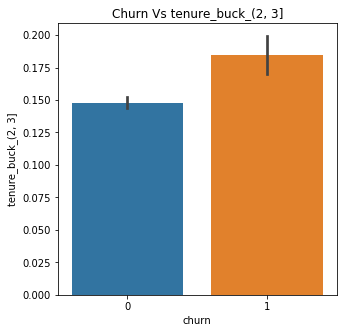

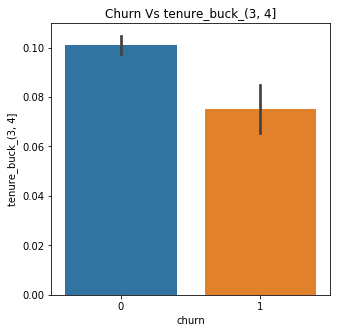

In [60]:

numericColumns = ['arpu_6','arpu_7','arpu_8','onnet_mou_6',
                  'offnet_mou_6','offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
                  'total_rech_num_6','total_rech_num_7',
                  'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8',
                  'last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8',
                  'tenure_buck_(1, 2]','tenure_buck_(2, 3]','tenure_buck_(3, 4]']
for col in numericColumns:
    plt.figure(figsize=(5, 5))
    plt.title('Churn Vs ' + col)
    sns.barplot(x='churn', y=col, data=telecom_high_value)
    plt.show()

# Conclusion From Comparision With Churn :
We have more values for a customers who are going to churn :
rpu_6, onnet_mou_6, offset_mou_6, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, total_rech_num_6

From the tenure buckets first month to second month, second month to third month we have higher values for customers who will churn

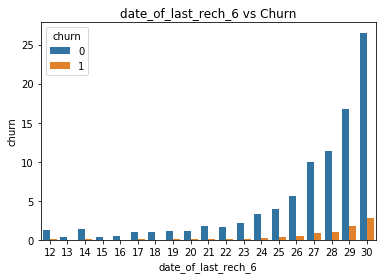

In [61]:
plt.title('date_of_last_rech_6 vs Churn')
sns.barplot(x="date_of_last_rech_6", y="churn", hue="churn", data=telecom_high_value, estimator=lambda x: len(x) / len(telecom_high_value) * 100)
plt.show()

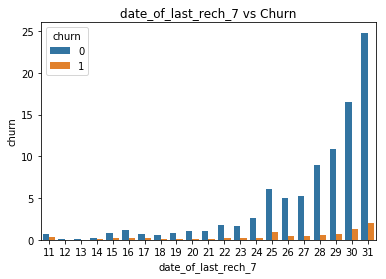

In [62]:
plt.title('date_of_last_rech_7 vs Churn')
sns.barplot(x="date_of_last_rech_7", y="churn", hue="churn", data=telecom_high_value, estimator=lambda x: len(x) / len(telecom_high_value) * 100)
plt.show()

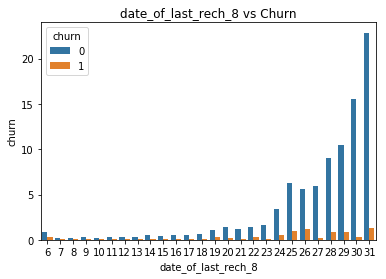

In [63]:
plt.title('date_of_last_rech_8 vs Churn')
sns.barplot(x="date_of_last_rech_8", y="churn", hue="churn", data=telecom_high_value, estimator=lambda x: len(x) / len(telecom_high_value) * 100)
plt.show()

# Conclusion From date_of_last_rech_6, date_of_last_rech_7 and date_of_last_rech_8 :
We find that during the end of the months customers are most likely to churn to go for a new operator
Hence we can provide more offers to these customers so that they are more likely to not churn to a new operator.

# Train Test Split:
We will split the data into training data and test data.

Training data will have 70% of the rows and the test data will have 30% of the rows.

In [64]:
# Drop churn and mobile_number columns
X = telecom_high_value.drop(['churn','mobile_number'],axis=1)

In [65]:
# Putting response variable (Churn) to y
y = telecom_high_value['churn']

In [66]:
# Perform Train Test Split:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Scaling on Training Data Set:

In [67]:
# Perform Scaling Using Standard Scaler:
scaler = StandardScaler()
numeric_cols = X_train.columns.tolist()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Performing PCA :

In [68]:
pca = PCA(svd_solver='randomized', random_state=42)

In [69]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [70]:
print(pca.components_)
column_names = list(X_train.columns)

pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'Feature':column_names})
pcs_df.head(10)

[[ 1.18036762e-01  1.30706429e-01  1.49222437e-01 ... -6.91842595e-02
  -3.20497322e-02 -1.23395543e-04]
 [ 3.01255764e-01  3.09676548e-01  2.73706710e-01 ...  3.50260793e-02
   1.95962673e-02 -8.60864750e-03]
 [-5.09055791e-02  1.10773038e-03  2.58822330e-02 ...  2.72692528e-02
  -2.97392444e-03 -6.89077770e-04]
 ...
 [-5.65214258e-01  4.30543204e-01  1.34163697e-02 ...  2.32822655e-03
  -4.03764790e-03  2.94461677e-03]
 [-2.83862352e-20 -9.38917036e-18  2.03040601e-16 ...  6.49609833e-17
  -5.91433027e-18  1.68771282e-16]
 [-0.00000000e+00  2.05493681e-16 -2.88903533e-17 ...  2.33664247e-16
   7.82335555e-17  1.23051294e-16]]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Feature
0,0.118037,0.301256,-0.050906,-0.171398,-0.091355,-0.060064,0.014212,0.007593,0.121005,-0.028891,arpu_6
1,0.130706,0.309677,0.001108,-0.175948,0.018487,-0.100272,0.064432,-0.105811,-0.110560,-0.011335,arpu_7
2,0.149222,0.273707,0.025882,-0.137575,0.003795,-0.081970,0.066564,-0.092333,-0.128490,-0.001183,arpu_8
3,-0.056262,0.121915,-0.082142,-0.112767,0.023508,-0.019934,0.018600,0.059008,0.378906,-0.093038,onnet_mou_6
4,0.022384,0.235915,-0.196443,-0.167975,-0.111824,0.011861,0.003562,-0.099730,-0.157055,0.065559,offnet_mou_6
5,0.021573,0.235081,-0.167655,-0.172624,-0.023394,-0.013272,0.043236,-0.161788,-0.296807,0.071020,offnet_mou_7
6,0.040879,0.020296,-0.016598,-0.087728,0.157907,-0.183942,0.185647,0.008258,0.085531,0.254415,roam_ic_mou_6
7,0.047127,0.024981,-0.028895,-0.091343,0.141603,-0.194167,0.198421,0.025038,0.151703,0.292777,roam_ic_mou_7
8,0.050074,0.044607,-0.028849,-0.086097,0.124247,-0.182497,0.193437,0.029269,0.133369,0.267040,roam_ic_mou_8
9,0.047905,0.094761,-0.068619,-0.023928,-0.213787,0.097485,-0.086917,0.034462,0.337311,-0.023632,loc_og_t2t_mou_6


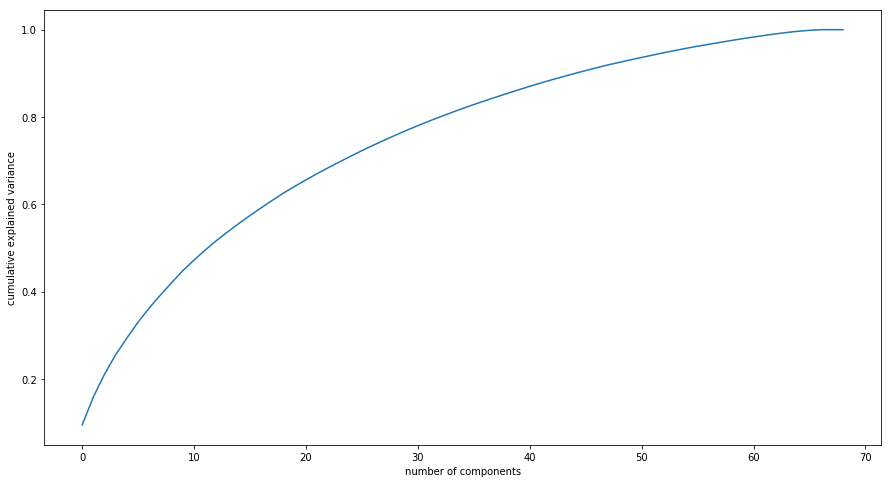

In [71]:
# View Variance Obtained From Number of Components of PCA :
fig = plt.figure(figsize = (15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


In [72]:
# Select 40 as the number of components as we PCA explains 90% of the variance with 40 components :
pca_final = IncrementalPCA(n_components=40)

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20985, 40)

# Scaling On Test Data :

In [73]:
# Perform Scaling on Test Data:
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [74]:
# Transform Test Data Set Using PCA:
df_test_pca = pca_final.transform(X_test)

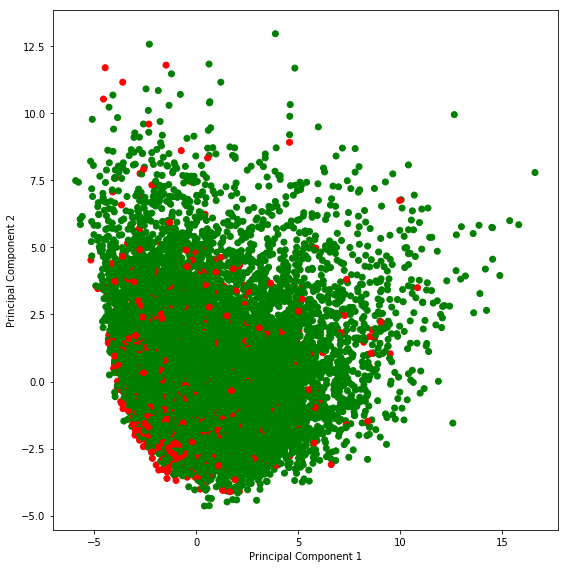

In [75]:
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

# Handle Class Imbalance Using Class Weight = Balanced Using Logistics Regression :
For handling class imbalance, we we will using class weight = balanced when performing Logistics Regresssion.

In [76]:
# Peform Logistics Regression On PCA Components usign class weight as balanced
learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca,y_train)

In [77]:
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.87'

In [78]:
#Making prediction on the test data
pred_test = model_pca.predict_proba(df_test_pca)
y_pred_default = model_pca.predict(df_test_pca)

In [79]:
print(classification_report(y_test,y_pred_default))


              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8179
           1       0.30      0.80      0.44       815

    accuracy                           0.82      8994
   macro avg       0.64      0.81      0.67      8994
weighted avg       0.92      0.82      0.85      8994



# Metric After Doing Logistics Regression On PCA Components :
We have very good scores for Recall and Accuracy on Test Data Set:

In [80]:
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))
# We have 0.81 as the accuracy score

[[6679 1500]
 [ 159  656]]
0.8155436957971981


In [81]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [82]:
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.866584857074492


# Drawing ROC Curve:

In [83]:
def draw_roc_curve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

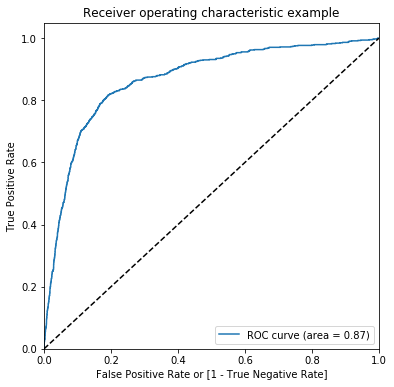

(array([0.        , 0.        , 0.        , ..., 0.99975547, 0.99987774,
        1.        ]),
 array([0.        , 0.00122699, 0.00245399, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99558445e+00, 9.95584450e-01, 9.94579265e-01, ...,
        2.09627020e-04, 1.47094508e-04, 3.86395255e-05]))

In [84]:
draw_roc_curve(y_pred_final.churn, y_pred_final.churn_prob)

In [85]:
cutoffs = [float(x)/10 for x in range(10)]
for i in cutoffs:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.074709,1,0,0,0,0,0,0,0,0,0
1,0,0.134506,1,1,0,0,0,0,0,0,0,0
2,0,0.138928,1,1,0,0,0,0,0,0,0,0
3,0,0.387716,1,1,1,1,0,0,0,0,0,0
4,0,0.600730,1,1,1,1,1,1,1,0,0,0


In [86]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
numbers = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.090616  0.000000  1.000000
0.1   0.1  0.336558  0.273261  0.971779
0.2   0.2  0.509006  0.466316  0.937423
0.3   0.3  0.633867  0.607287  0.900613
0.4   0.4  0.739382  0.727106  0.862577
0.5   0.5  0.815544  0.816603  0.804908
0.6   0.6  0.861686  0.876268  0.715337
0.7   0.7  0.888704  0.917472  0.600000
0.8   0.8  0.902713  0.948771  0.440491
0.9   0.9  0.909718  0.977748  0.226994


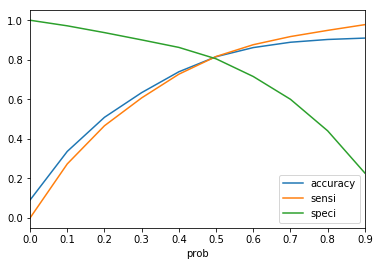

In [87]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [88]:
def find_optimal_cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

In [89]:
# Find optimal probability threshold
threshold = find_optimal_cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.4940434701367155]


In [90]:
# Creating new column 'pred_churn' with 1 if Churn_Prob> 0.494 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.494 else 0)

y_pred_final.churn.value_counts()

0    8179
1     815
Name: churn, dtype: int64

# Confusion Matrix

In [91]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6647, 1532],
       [ 153,  662]], dtype=int64)

# Logistic Regression model matrics with PCA

In [92]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# Precision
print('Precision: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))


Accuracy Score on test data:  0.8155436957971981
Sensitivity:  0.8122699386503067
Specificity:  0.8126910380242084
false postive rate:  0.18730896197579167
Precision:  0.3017319963536919
Negative predictive value:  0.9775


# Logistics Regression with RFE:

In [93]:
# Select 20 features for doing RFE:
logistics_regression = LogisticRegression()
rfe = RFE(logistics_regression, 20)
rfe = rfe.fit(X_train, y_train)

In [94]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 34),
 ('offnet_mou_6', False, 9),
 ('offnet_mou_7', False, 39),
 ('roam_ic_mou_6', False, 44),
 ('roam_ic_mou_7', False, 5),
 ('roam_ic_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 24),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2f_mou_6', True, 1),
 ('loc_og_t2c_mou_6', False, 27),
 ('loc_og_t2c_mou_7', False, 38),
 ('loc_og_t2c_mou_8', False, 16),
 ('std_og_t2f_mou_6', False, 45),
 ('std_og_t2f_mou_7', False, 33),
 ('std_og_t2f_mou_8', True, 1),
 ('isd_og_mou_6', False, 22),
 ('spl_og_mou_6', False, 40),
 ('spl_og_mou_7', False, 26),
 ('spl_og_mou_8', True, 1),
 ('og_others_6', False, 47),
 ('og_others_7', False, 49),
 ('og_others_8', False, 50),
 ('loc_ic_t2t_mou_6', False, 3),
 ('loc_ic_t2m_mou_6', False, 28),
 ('loc_ic_t2f_mou_6', False, 13),
 ('std_ic_t2t_mou_6', False, 23),
 ('std_ic_t2t_mou_7', False, 35),
 ('std_ic_t2m_mou_6', False, 42),
 ('std_ic_t2f_mou_6', False, 10),
 ('std_ic_t2f_

In [95]:
columns_list = X_train.columns[rfe.support_]
columns_list

Index(['arpu_6', 'arpu_7', 'arpu_8', 'roam_ic_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'std_og_t2f_mou_8', 'spl_og_mou_8',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'spl_ic_mou_8',
       'date_of_last_rech_7', 'date_of_last_rech_8', 'last_day_rch_amt_8',
       'monthly_2g_6', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon',
       'aug_vbc_3g'],
      dtype='object')

In [96]:
# Function to check VIF of the given dataframe:
def check_vif(X_train_sm, columns_list):
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train_sm[columns_list].columns
    vif['VIF'] = [variance_inflation_factor(X_train_sm[columns_list].values, i) for i in range(X_train_sm[columns_list].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [97]:
X_train_sm = sm.add_constant(X_train[columns_list])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20964
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4197.6
Date:                Sun, 03 Nov 2019   Deviance:                       8395.2
Time:                        17:19:09   Pearson chi2:                 1.69e+05
No. Iterations:                     8   Covariance Type:             nonrobust
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.6570      0.057    -64.572      0.000      -3.768      -3.546
arpu_6                  0.4222      0.032     13.256      0.000       0.360       0.485
arpu_7                  0.3648      0.036     10.044      0.000       0.294       0.436
arpu_8                 -1.1964      0.057    -21.061      0.000      -1.308      -1.085
roam_ic_mou_8           0.3050      0.022     13.787      0.000       0.262       0.348
loc_og_t2m_mou_6       -0.2545      0.037     -6.855      0.000      -0.327      -0.182
loc_og_t2f_mou_6       -0.1358      0.047     -2.867      0.004      -0.229      -0.043
std_og_t2f_mou_8       -0.1136      0.063     -1.797      0.072      -0.238       0.010
spl_og_mou_8           -0.2438      0.047     -5.217      0.000      -0.335      -0.152
std_ic_t2f_mou_7        0.1083      0.042      2.555      0.011       0.025       0.191
std_ic_t2f_mou_8       -0.3125      0.072     -4.364      0.000      -0.453      -0.172
spl_ic_mou_8           -0.6563      0.089     -7.398      0.000      -0.830      -0.482
date_of_last_rech_7    -0.1442      0.026     -5.531      0.000      -0.195      -0.093
date_of_last_rech_8    -0.3119      0.025    -12.528      0.000      -0.361      -0.263
last_day_rch_amt_8     -0.7409      0.059    -12.663      0.000      -0.856      -0.626
monthly_2g_6           -0.1146      0.043     -2.658      0.008      -0.199      -0.030
monthly_2g_8           -0.3807      0.070     -5.450      0.000      -0.518      -0.244
sachet_2g_8            -0.3560      0.054     -6.616      0.000      -0.461      -0.251
monthly_3g_8           -0.2572      0.070     -3.657      0.000      -0.395      -0.119
aon                    -0.3380      0.037     -9.088      0.000      -0.411      -0.265
aug_vbc_3g             -0.2142      0.066     -3.266      0.001      -0.343      -0.086
=======================================================================================
"""

In [98]:
# Check the VIF
vif_result = check_vif(X_train_sm, columns_list)
vif_result

,Features,VIF
2,arpu_8,2.31
1,arpu_7,2.07
9,std_ic_t2f_mou_8,1.73
8,std_ic_t2f_mou_7,1.67
0,arpu_6,1.56
17,monthly_3g_8,1.55
19,aug_vbc_3g,1.54
15,monthly_2g_8,1.49
14,monthly_2g_6,1.42
13,last_day_rch_amt_8,1.36


In [99]:
# Drop std_og_t2f_mou_8 as it has probability 0.07 which is greater than 0.05
columns_list = columns_list.drop('std_og_t2f_mou_8',1)

# Model 2 Logistics Regression Using RFE:

In [100]:
X_train_sm = sm.add_constant(X_train[columns_list])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20965
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4199.5
Date:                Sun, 03 Nov 2019   Deviance:                       8399.0
Time:                        17:19:16   Pearson chi2:                 1.64e+05
No. Iterations:                     8   Covariance Type:             nonrobust
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.6522      0.056    -64.709      0.000      -3.763      -3.542
arpu_6                  0.4238      0.032     13.310      0.000       0.361       0.486
arpu_7                  0.3651      0.036     10.057      0.000       0.294       0.436
arpu_8                 -1.2035      0.057    -21.212      0.000      -1.315      -1.092
roam_ic_mou_8           0.3057      0.022     13.813      0.000       0.262       0.349
loc_og_t2m_mou_6       -0.2544      0.037     -6.852      0.000      -0.327      -0.182
loc_og_t2f_mou_6       -0.1477      0.047     -3.144      0.002      -0.240      -0.056
spl_og_mou_8           -0.2431      0.047     -5.203      0.000      -0.335      -0.152
std_ic_t2f_mou_7        0.0976      0.042      2.333      0.020       0.016       0.180
std_ic_t2f_mou_8       -0.3330      0.071     -4.679      0.000      -0.472      -0.194
spl_ic_mou_8           -0.6562      0.089     -7.392      0.000      -0.830      -0.482
date_of_last_rech_7    -0.1433      0.026     -5.498      0.000      -0.194      -0.092
date_of_last_rech_8    -0.3120      0.025    -12.534      0.000      -0.361      -0.263
last_day_rch_amt_8     -0.7437      0.058    -12.741      0.000      -0.858      -0.629
monthly_2g_6           -0.1161      0.043     -2.695      0.007      -0.201      -0.032
monthly_2g_8           -0.3781      0.070     -5.417      0.000      -0.515      -0.241
sachet_2g_8            -0.3555      0.054     -6.608      0.000      -0.461      -0.250
monthly_3g_8           -0.2563      0.070     -3.643      0.000      -0.394      -0.118
aon                    -0.3389      0.037     -9.121      0.000      -0.412      -0.266
aug_vbc_3g             -0.2148      0.066     -3.274      0.001      -0.343      -0.086
=======================================================================================
"""

In [101]:
# Check the VIF
vif_result = check_vif(X_train_sm, columns_list)
vif_result

,Features,VIF
2,arpu_8,2.31
1,arpu_7,2.07
7,std_ic_t2f_mou_7,1.65
8,std_ic_t2f_mou_8,1.65
0,arpu_6,1.56
16,monthly_3g_8,1.55
18,aug_vbc_3g,1.54
14,monthly_2g_8,1.49
13,monthly_2g_6,1.42
12,last_day_rch_amt_8,1.35


# Conclusion From Model 2 Of Logisitcs Regression With 19 Variables :
We are good to go for predicting whether customer will chrun or nor as probability values are less than 0.05 and VIF values are less than 3

In [102]:
# Making Predcitions Using Logistics Regression 
y_train_pred = res.predict(X_train_sm)

In [103]:
y_train_pred 

88105    0.004348
34588    0.063267
16623    0.001402
54904    0.016017
33555    0.049409
25467    0.028445
44097    0.080650
81316    0.000133
20754    0.039278
4688     0.065060
83409    0.017878
43627    0.028792
40496    0.021516
34252    0.017291
31744    0.030938
79403    0.021957
93140    0.455872
87528    0.100035
8466     0.032712
76424    0.005185
23565    0.005490
19391    0.017664
7424     0.002329
2784     0.001688
3283     0.025065
88564    0.066159
17130    0.041654
95244    0.165316
88386    0.309364
9297     0.123869
7225     0.022480
98844    0.022261
90515    0.125201
91041    0.026466
80190    0.154959
47047    0.002366
33082    0.009966
80134    0.037210
10182    0.070054
16114    0.006480
58621    0.061656
60309    0.040864
74908    0.001812
57546    0.302059
68852    0.499926
8402     0.284591
11564    0.032631
87755    0.003085
36444    0.055966
35808    0.579325
1250     0.001312
91949    0.105358
21564    0.004464
86605    0.263871
27202    0.042575
46278    0

In [104]:
y_train_pred_final = pd.DataFrame({'Churned':y_train, 'Churned_prob':y_train_pred})
y_train_pred_final.head()

,Churned,Churned_prob
88105,0,0.004348
34588,0,0.063267
16623,0,0.001402
54904,0,0.016017
33555,0,0.049409


In [105]:
def plot_roc_curve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [106]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churned, y_train_pred_final.Churned_prob, drop_intermediate = False )

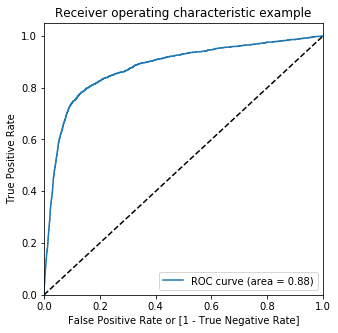

In [107]:
plot_roc_curve(y_train_pred_final.Churned, y_train_pred_final.Churned_prob)

In [108]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/20 for x in range(20)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churned_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churned,Churned_prob,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
88105,0,0.004348,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34588,0,0.063267,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16623,0,0.001402,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54904,0,0.016017,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33555,0,0.049409,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specifity'])

numbers = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      probability  accuracy  sensitivity  specifity
0.00         0.00  0.084537     1.000000   0.000000
0.05         0.05  0.695020     0.883315   0.677633
0.10         0.10  0.833024     0.804397   0.835667
0.15         0.15  0.885585     0.743517   0.898704
0.20         0.20  0.905742     0.666855   0.927802
0.25         0.25  0.915988     0.602029   0.944979
0.30         0.30  0.920038     0.515784   0.957368
0.35         0.35  0.922993     0.446449   0.966998
0.40         0.40  0.922659     0.361330   0.974494
0.45         0.45  0.921420     0.281849   0.980480
0.50         0.50  0.920658     0.219278   0.985425
0.55         0.55  0.920133     0.170237   0.989381
0.60         0.60  0.919943     0.135851   0.992348
0.65         0.65  0.919371     0.103157   0.994743
0.70         0.70  0.918561     0.073281   0.996617
0.75         0.75  0.917751     0.049042   0.997970
0.80         0.80  0.917370     0.033258   0.999011
0.85         0.85  0.916750     0.020857   0.999479
0.90        

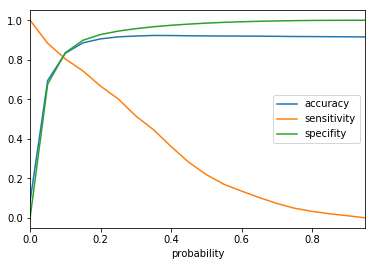

In [110]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specifity'])
plt.show()

In [111]:
#### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Churned_prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,Churned,Churned_prob,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
88105,0,0.004348,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34588,0,0.063267,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16623,0,0.001402,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54904,0,0.016017,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33555,0,0.049409,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [112]:
print(classification_report(y_train,y_train_pred_final['final_predicted']))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90     19211
           1       0.31      0.80      0.45      1774

    accuracy                           0.83     20985
   macro avg       0.65      0.82      0.68     20985
weighted avg       0.92      0.83      0.86     20985



In [113]:
print('Accuracy for Training Data',round(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.final_predicted),2))

confusion2 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.final_predicted )

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

print('True Positives ', TP)
print('True Negatives ',TN)
print('False Positives', FP)
print('False Negatives', FN)

Accuracy for Training Data 0.83
True Positives  1427
True Negatives  16054
False Positives 3157
False Negatives 347


In [114]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8043968432919955

In [115]:
# Let us calculate specificity
TN / float(TN+FP)

0.8356670657435844

In [116]:
# Calculate false postive rate - predicting Chrun when it will be not Churn
print(FP/ float(TN+FP))

0.1643329342564156


In [117]:
#Positive predictive value  or Precision
print (TP / float(TP+FP))

0.3113001745200698


In [118]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9788427534906408


In [119]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churned, y_train_pred_final.Churned_prob)

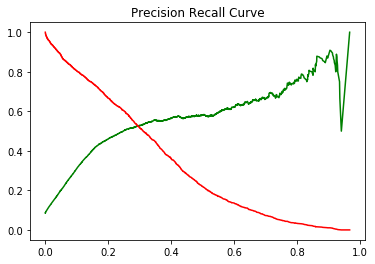

In [120]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision Recall Curve')
plt.show()

In [121]:
# Build a model on the test data set
X_test_sm = sm.add_constant(X_test[columns_list])

In [122]:
# Predict on the model created for test data set
y_test_pred = res.predict(X_test_sm)

In [123]:
# Create dataframe based on the predicted values
y_pred = pd.DataFrame(y_test_pred)
y_pred

,0
76438,0.008953
72869,0.028355
86053,0.013699
29093,0.032754
96385,0.034778
16713,0.139399
78343,0.066872
81467,0.284536
56584,0.035184
9517,0.003349


In [124]:
# Check the predicted values of the Churned column in the test dataset
y_test_df = pd.DataFrame(y_test)
y_test_df

,churn
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [125]:
y_test_df.reset_index(drop=True, inplace=True)
y_pred.reset_index(drop=True, inplace=True)

In [126]:
# Create a dataframe concating the predicted values of the model and actual predicted values
y_pred_final = pd.concat([y_test_df, y_pred],axis=1)

In [127]:
# View the converted and predicted values
y_pred_final.head()
# Rename the column 0 to churned_prob

,churn,0
0,0,0.008953
1,0,0.028355
2,0,0.013699
3,0,0.032754
4,0,0.034778


In [128]:
# Rename the column 0 to churned_prob
y_pred_final= y_pred_final.rename(columns={ 0 : 'churned_prob'})
# View converted values with the actual probaility values
y_pred_final.head()

,churn,churned_prob
0,0,0.008953
1,0,0.028355
2,0,0.013699
3,0,0.032754
4,0,0.034778


In [141]:
# Using 0.1 as the cutoff , assign the lead scores.
y_pred_final['final_predicted'] = y_pred_final.churned_prob.map(lambda x: 1 if x > 0.15 else 0)

In [142]:
y_pred_final['churn'].value_counts()

0    8179
1     815
Name: churn, dtype: int64

In [143]:
# CLassification Report On Test Data Set Using Logisitcs Regression :
print(classification_report(y_pred_final.churn, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      8179
           1       0.41      0.73      0.53       815

    accuracy                           0.88      8994
   macro avg       0.69      0.81      0.73      8994
weighted avg       0.92      0.88      0.90      8994



In [144]:
# Accuracy on the Test Data Set:
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.880920613742495

In [145]:
# Confusion Matrix:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[7326,  853],
       [ 218,  597]], dtype=int64)

In [146]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

print('True Positives ', TP)
print('True Negatives ',TN)
print('False Positives', FP)
print('False Negatives', FN)

True Positives  597
True Negatives  7326
False Positives 853
False Negatives 218


In [147]:
# Calculate sensitivity on the test data set:
TP / float(TP+FN)

0.7325153374233129

In [148]:
# Let us calculate specificity on the test data set:
TN / float(TN+FP)

0.8957085218241839

In [149]:
#Positive predictive value  or Precision
print (TP / float(TP+FP))

0.41172413793103446


In [150]:
# Calculate false postive rate - predicting Churn when it will be not Churn
print(FP/ float(TN+FP))

0.10429147817581612


We got better results when Logistics Regression Was Done Using PCA as the Recall and Accuracy were better for the test data set in Logisitics Regression Done Using PCA when compared to RFE with 19 variables

# Using Decision Tree For Predicting Churn :

In [151]:
# Using Decision Tree for Making Predictions
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [152]:
# Making predictions using Decision Tree
y_pred_default = dt_default.predict(df_test_pca)

print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Accuracy Score', accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      8179
           1       0.24      0.64      0.34       815

    accuracy                           0.78      8994
   macro avg       0.60      0.72      0.61      8994
weighted avg       0.89      0.78      0.82      8994

[[6505 1674]
 [ 297  518]]
Accuracy Score 0.7808539026017345


# Conclusion From Decision Tree Metrics:
We get very low recall in Decision Tree, we will tune the hyper-parameters in order to check the metric again.

In [153]:
confusion_tree = confusion_matrix(y_test,y_pred_default)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Accuracy Score', accuracy_score(y_test,y_pred_default))

print('Sensitivity: ', TP / float(TP+FN))

print('Specificity: ',TN / float(TN+FP))

print('false postive rate: ',FP/ float(TN+FP))

print('Precision: ', TP / float(TP+FP))

print('Negative predictive value: ',TN / float(TN+ FN))


Accuracy Score 0.7808539026017345
Sensitivity:  0.6355828220858896
Specificity:  0.7953295023841546
false postive rate:  0.20467049761584546
Precision:  0.2363138686131387
Negative predictive value:  0.9563363716553954


# Hyper Parameter Tuning Using Decision Tree:

In [154]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",n_jobs=-1, return_train_score = True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=-1, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scori

In [155]:
# Shape Of Training Data :
y_train.shape

(20985,)

In [156]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.507175,0.044947,0.004125,0.006068,1,{'max_depth': 1},0.693664,0.792947,0.671670,0.700262,0.694948,0.710698,0.042274,38,0.688509,0.799500,0.694008,0.688766,0.690273,0.712211,0.043688
1,1.057800,0.049575,0.004598,0.002415,2,{'max_depth': 2},0.770605,0.837980,0.753634,0.786514,0.786225,0.786991,0.028220,31,0.769167,0.848642,0.770312,0.776150,0.783906,0.789635,0.029963
2,1.170798,0.153351,0.004976,0.006419,3,{'max_depth': 3},0.587661,0.640934,0.593043,0.755540,0.763823,0.668192,0.077006,39,0.596414,0.651001,0.602514,0.745592,0.760974,0.671299,0.069731
3,1.126141,0.045337,0.005682,0.005593,4,{'max_depth': 4},0.727966,0.711461,0.737193,0.682630,0.711392,0.714129,0.018602,37,0.740513,0.724923,0.742912,0.681677,0.711359,0.720277,0.022418
4,1.233467,0.040010,0.002399,0.003497,5,{'max_depth': 5},0.772749,0.763879,0.748630,0.719085,0.733317,0.747534,0.019574,34,0.786323,0.780021,0.763760,0.719442,0.743463,0.758602,0.024562


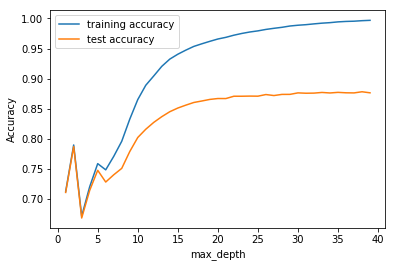

In [157]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [158]:
## Lets tune min sample leaf
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",n_jobs=-1, return_train_score = True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score

In [159]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.859812,0.617459,0.003125,0.006251,5,{'min_samples_leaf': 5},0.845164,0.835835,0.844174,0.843936,0.843899,0.842602,0.003414,1,0.941979,0.935192,0.937157,0.940195,0.941390,0.939183,0.002598
1,1.471996,0.065967,0.006540,0.008023,25,{'min_samples_leaf': 25},0.772749,0.770789,0.774601,0.768406,0.781697,0.773648,0.004520,2,0.822541,0.824875,0.826066,0.827436,0.832807,0.826745,0.003431
2,1.324166,0.028363,0.003125,0.006250,45,{'min_samples_leaf': 45},0.761315,0.743150,0.750060,0.753395,0.750953,0.751775,0.005859,5,0.790731,0.780855,0.786693,0.780796,0.788195,0.785454,0.003993
3,1.279271,0.020076,0.000000,0.000000,65,{'min_samples_leaf': 65},0.753930,0.760543,0.753634,0.753634,0.754290,0.755206,0.002679,3,0.783463,0.789254,0.784906,0.779604,0.782119,0.783869,0.003209
4,1.239262,0.024266,0.003126,0.006251,85,{'min_samples_leaf': 85},0.752978,0.747200,0.750298,0.765070,0.748332,0.752776,0.006452,4,0.779889,0.773588,0.774422,0.775316,0.771279,0.774899,0.002833


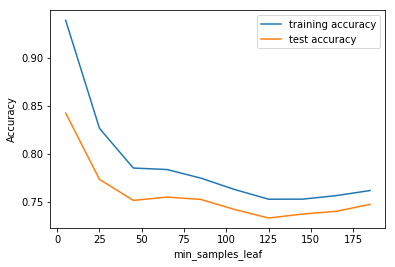

In [160]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [161]:

## Tuning min sample split
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",n_jobs=-1, return_train_score = True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [162]:

# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.534529,0.696530,0.003998,0.000633,5,{'min_samples_split': 5},0.870414,0.879199,0.873481,0.877293,0.876311,0.875340,0.003078,1,0.995175,0.994460,0.994043,0.993984,0.994818,0.994496,0.000455
1,2.089319,0.126152,0.003199,0.000399,25,{'min_samples_split': 25},0.831348,0.829640,0.837265,0.824398,0.830791,0.830689,0.004107,2,0.930125,0.928282,0.930605,0.927091,0.926321,0.928485,0.001664
2,1.853456,0.052224,0.003398,0.000489,45,{'min_samples_split': 45},0.799428,0.809626,0.812485,0.796045,0.797188,0.802954,0.006764,3,0.882886,0.892304,0.888670,0.882773,0.885044,0.886335,0.003670
3,1.746103,0.063482,0.004324,0.005807,65,{'min_samples_split': 65},0.768461,0.792947,0.784608,0.780319,0.776692,0.780605,0.008139,4,0.840651,0.862700,0.855552,0.855671,0.848591,0.852633,0.007470
4,1.731651,0.043596,0.003725,0.006063,85,{'min_samples_split': 85},0.760600,0.775792,0.775554,0.769121,0.765729,0.769359,0.005826,5,0.819265,0.838218,0.836073,0.833810,0.828816,0.831236,0.006752


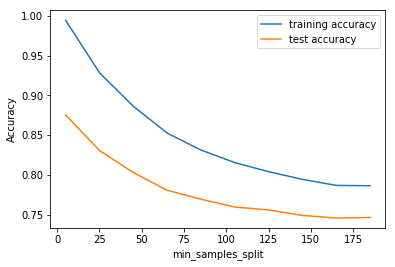

In [163]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Optimizing Hyper-Parameters For Decision Tree:

In [164]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 13.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                  

In [165]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.911667,0.449153,0.007850,0.006515,entropy,5,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.768699,0.786276,0.749107,0.706457,0.716873,0.745485,0.030192,121
1,1.929760,0.102511,0.001602,0.001623,entropy,5,5,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.768699,0.786276,0.748630,0.706457,0.716873,0.745390,0.030181,125
2,1.847492,0.058959,0.004198,0.001598,entropy,5,5,45,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.768699,0.785799,0.748630,0.706457,0.716873,0.745294,0.030052,133
3,1.702151,0.067731,0.002999,0.000001,entropy,5,5,65,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.768699,0.785799,0.748630,0.706457,0.716873,0.745294,0.030052,133
4,1.791274,0.218676,0.003126,0.006251,entropy,5,5,85,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.768699,0.785799,0.748630,0.706457,0.716873,0.745294,0.030052,133


In [166]:

# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.7898022396950203
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [167]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
clf_gini.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [168]:
y_pred_default = clf_gini.predict(df_test_pca)
print(classification_report(y_test,y_pred_default))

confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      8179
           1       0.23      0.64      0.34       815

    accuracy                           0.77      8994
   macro avg       0.59      0.71      0.60      8994
weighted avg       0.89      0.77      0.81      8994



array([[6404, 1775],
       [ 293,  522]], dtype=int64)

In [169]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('Precision: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))


Sensitivity:  0.6404907975460122
Specificity:  0.7829808044993275
false postive rate:  0.21701919550067245
Precision:  0.22725293861558554
Negative predictive value:  0.9562490667463043


# Conclusion From Decision Tree Model Obtained By Hyper-Tuning Parameters:
Decision Tree performed poorly compared to Logisitics Regression as we had lower accuracy, recall, precision and f1-score

# Building Model Using Random Forest:

In [170]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(df_train_pca,y_train)

# Making predictions
y_pred_test = rfc.predict(df_test_pca)

In [171]:
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      8179
           1       0.23      0.64      0.34       815

    accuracy                           0.77      8994
   macro avg       0.59      0.71      0.60      8994
weighted avg       0.89      0.77      0.81      8994



In [172]:
confusion_tree_hyper=confusion_matrix(y_test,y_pred_test)


In [173]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.09815950920245399
Specificity:  0.9931531972123732
false postive rate:  0.006846802787626849
positive predictive value:  0.5882352941176471
Negative predictive value:  0.9170241589523594
Misclassification Rate:  0.0879475205692684


# Tuning Hyper-parameters For Random Forest:

In [174]:
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,
                   return_train_score = True)
rf_with_pca.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [175]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.194165,0.028291,0.320948,0.148498,2,{'max_depth': 2},0.752739,0.750298,0.745533,0.770789,0.717350,0.747343,0.017264,4,0.766784,0.765249,0.751549,0.755599,0.712014,0.750239,0.019953
1,2.340571,0.516912,0.015196,0.001600,7,{'max_depth': 7},0.856122,0.851561,0.859662,0.863712,0.865348,0.859280,0.005023,3,0.885804,0.887479,0.882893,0.880510,0.886116,0.884560,0.002517
2,1.778955,0.019981,0.015534,0.001041,12,{'max_depth': 12},0.900429,0.904456,0.913271,0.913033,0.907054,0.907648,0.004966,2,0.964973,0.963426,0.963903,0.962592,0.959438,0.962866,0.001879
3,1.642548,0.170263,0.015774,0.000182,17,{'max_depth': 17},0.908766,0.911127,0.920658,0.922087,0.916587,0.915845,0.005197,1,0.977423,0.982190,0.982368,0.983679,0.978557,0.980843,0.002413


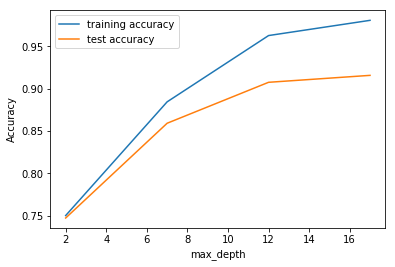

In [176]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [177]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score = True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [178]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,15.594589,0.693883,0.147390,0.024630,100,{'n_estimators': 100},0.903764,0.905647,0.917084,0.911365,0.914442,0.910460,0.005071,4,0.960565,0.959852,0.957589,0.956934,0.959021,0.958792,0.001358
1,71.625440,0.176340,0.560158,0.021634,500,{'n_estimators': 500},0.906384,0.906362,0.917084,0.916369,0.913727,0.911985,0.004717,1,0.961637,0.959971,0.959257,0.958423,0.960629,0.959983,0.001106
2,128.969156,0.500549,1.040088,0.109393,900,{'n_estimators': 900},0.904240,0.904217,0.919943,0.914463,0.914204,0.911413,0.006214,2,0.961697,0.960210,0.959971,0.958542,0.959974,0.960079,0.001002
3,187.873092,8.656951,1.609793,0.330627,1300,{'n_estimators': 1300},0.905193,0.904456,0.919466,0.913033,0.913966,0.911222,0.005673,3,0.961280,0.960269,0.960031,0.958304,0.960569,0.960091,0.000987


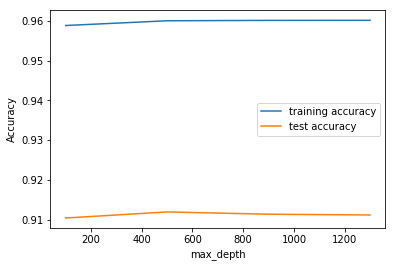

In [179]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [180]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score = True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [181]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.817289,0.357372,0.020663,0.004815,4,{'max_features': 4},0.884945,0.884203,0.899214,0.901835,0.901573,0.894353,0.008041,5,0.944600,0.940136,0.936264,0.940553,0.944130,0.941137,0.003034
1,1.939944,0.156280,0.019624,0.006054,8,{'max_features': 8},0.891615,0.892066,0.900167,0.904217,0.901335,0.897879,0.005107,2,0.947161,0.949786,0.946807,0.939659,0.940914,0.944865,0.003898
2,3.097579,0.111226,0.012500,0.006250,14,{'max_features': 14},0.890186,0.898499,0.899929,0.903503,0.893947,0.897212,0.004661,3,0.942217,0.946748,0.941268,0.941327,0.943832,0.943078,0.002055
3,4.748563,0.229629,0.012755,0.006397,20,{'max_features': 20},0.899952,0.889683,0.901835,0.908030,0.898713,0.899643,0.005921,1,0.952642,0.940017,0.942816,0.944663,0.943237,0.944675,0.004259
4,4.946938,0.218574,0.014005,0.007584,24,{'max_features': 24},0.891377,0.892781,0.897308,0.901596,0.895853,0.895783,0.003593,4,0.942813,0.944901,0.941982,0.934239,0.938472,0.940481,0.003748


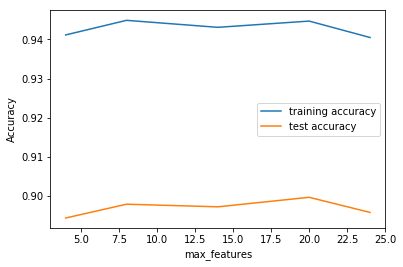

In [182]:

# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [183]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score = True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [184]:

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.667046,0.441606,0.028719,0.010336,100,{'min_samples_leaf': 100},0.833492,0.829402,0.842030,0.840362,0.842707,0.837598,0.005243,1,0.860487,0.854062,0.856386,0.854360,0.853416,0.855742,0.002572
1,1.413707,0.204072,0.010244,0.005954,150,{'min_samples_leaf': 150},0.817294,0.812009,0.816774,0.819157,0.829123,0.818871,0.005642,2,0.830285,0.832321,0.832738,0.828270,0.835547,0.831832,0.002447
2,1.067528,0.046370,0.015924,0.004385,200,{'min_samples_leaf': 200},0.810386,0.808673,0.820110,0.822969,0.811487,0.814725,0.005708,3,0.827903,0.822611,0.830593,0.825351,0.817619,0.824815,0.004469
3,0.979507,0.023420,0.012575,0.006289,250,{'min_samples_leaf': 250},0.791091,0.815583,0.802716,0.809388,0.808151,0.805385,0.008236,4,0.807827,0.830355,0.812723,0.811592,0.812079,0.814915,0.007906
4,0.937164,0.014898,0.012501,0.006250,300,{'min_samples_leaf': 300},0.788471,0.804384,0.785561,0.795568,0.795996,0.793996,0.006574,5,0.804194,0.814391,0.794973,0.798725,0.802192,0.802895,0.006550


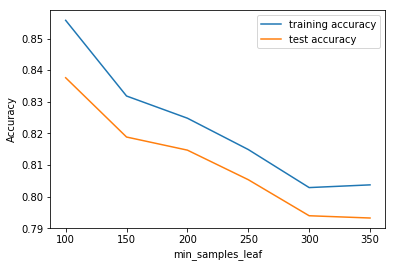

In [185]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [186]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 700, 50)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score = True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [187]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.532507,0.330004,0.023345,6.737459e-03,100,{'min_samples_split': 100},0.868509,0.868477,0.873958,0.877293,0.874166,0.872480,0.003464,1,0.910109,0.903205,0.902252,0.905111,0.900768,0.904289,0.003233
1,1.776535,0.058042,0.021797,8.347332e-03,150,{'min_samples_split': 150},0.861363,0.856802,0.863236,0.871575,0.864633,0.863522,0.004816,2,0.890570,0.892542,0.889147,0.887122,0.890464,0.889969,0.001789
2,1.669502,0.108553,0.019832,5.930224e-03,200,{'min_samples_split': 200},0.854931,0.851084,0.856088,0.857041,0.854623,0.854753,0.002026,3,0.884196,0.881463,0.877472,0.875864,0.876705,0.879140,0.003175
3,1.358994,0.080024,0.015625,6.641573e-07,250,{'min_samples_split': 250},0.838971,0.847272,0.845604,0.860376,0.856768,0.849797,0.007768,4,0.866921,0.872051,0.869311,0.872349,0.873608,0.870848,0.002413
4,1.252015,0.017935,0.016152,6.424240e-04,300,{'min_samples_split': 300},0.844688,0.829402,0.844889,0.851561,0.852002,0.844508,0.008176,5,0.869125,0.860138,0.863117,0.860019,0.855501,0.861580,0.004489


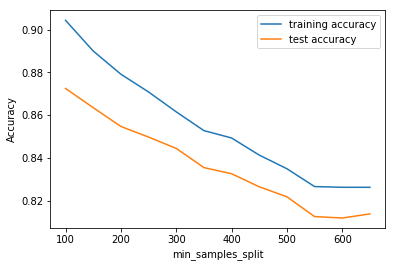

In [188]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Performing Random Forest With Hyper-Tuning Of Parameters:

In [189]:
param_grid = {
    'max_depth': [10,12],
    'min_samples_leaf': range(150, 250, 50),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': [300,400,500], 
    'max_features': [15, 20]
}

In [190]:
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 3, verbose = 1, n_jobs=-1)

In [191]:
grid_search.fit(X_train,y_train)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 21.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [192]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8772456516559447 using {'max_depth': 12, 'max_features': 15, 'min_samples_leaf': 150, 'min_samples_split': 200, 'n_estimators': 500}


In [193]:
rfc_final = RandomForestClassifier(bootstrap=True,class_weight='balanced',
                             max_depth=12,
                             min_samples_leaf=150, 
                             min_samples_split=200,
                             max_features=15,
                             n_estimators=500)

In [194]:
# fit
rfc_final.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=12, max_features=15,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=150,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

# Making Predictions With Random Forest:

In [195]:
# Make predictions on test data set
predictions = rfc_final.predict(X_test)

In [196]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8179
           1       0.40      0.82      0.54       815

    accuracy                           0.87      8994
   macro avg       0.69      0.85      0.73      8994
weighted avg       0.93      0.87      0.89      8994



# Conclusion From Random Forest Parameters:
We get very good recall and accuracy using Random Forest.

In [197]:
confusion_rm_f = metrics.confusion_matrix( y_test, predictions )


In [198]:
TN = confusion_rm_f[0,0] # true positive 
TP = confusion_rm_f[1,1] # true negatives
FP = confusion_rm_f[0,1] # false positives
FN = confusion_rm_f[1,0] # false negatives

print('Accuracy Score: ',accuracy_score(y_test,predictions))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('Precision: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))


Accuracy Score:  0.8725817211474316
Sensitivity:  0.8233128834355828
Specificity:  0.8774911358356767
false postive rate:  0.12250886416432327
Precision:  0.40107591153616257
Negative predictive value:  0.9803305559349815


# Finding Most Important Variables in Determining Churn :

In [199]:
feature_names=list(X_train.columns.values)
important_features_dict = {}
for name, importance in zip(feature_names, rfc_final.feature_importances_):
    important_features_dict[name]=importance
#Sorting Dictionary in descending order of the importance variable
d_descending = OrderedDict(sorted(important_features_dict.items(), 
                                  key=lambda kv: kv[1], reverse=True))

In [200]:
dic= dict(d_descending)

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n=20
n_items = take(n, dic.items())

In [201]:
print('These are top 20 driver variable: ',n_items)


These are top 20 driver variable:  [('arpu_8', 0.24767758262060194), ('last_day_rch_amt_8', 0.18878466015575862), ('roam_ic_mou_8', 0.12987726433131266), ('max_rech_amt_8', 0.12585631231780395), ('date_of_last_rech_8', 0.07563792869745083), ('spl_og_mou_8', 0.03772777147324345), ('std_ic_t2f_mou_8', 0.022118439724108555), ('aon', 0.01388408319502577), ('roam_ic_mou_7', 0.013600092864450776), ('loc_og_t2f_mou_6', 0.011544399104086198), ('arpu_7', 0.010309466990204099), ('loc_ic_t2f_mou_6', 0.010051479128889856), ('ic_others_8', 0.009151800390814572), ('loc_og_t2m_mou_6', 0.008809739540319902), ('aug_vbc_3g', 0.008452874467195608), ('loc_ic_t2m_mou_6', 0.007074895077492482), ('total_rech_num_7', 0.0065919849764234), ('arpu_6', 0.005151034181099319), ('onnet_mou_6', 0.005005033853313253), ('max_rech_amt_7', 0.004778262568738467)]


# Plot to show the important variables:

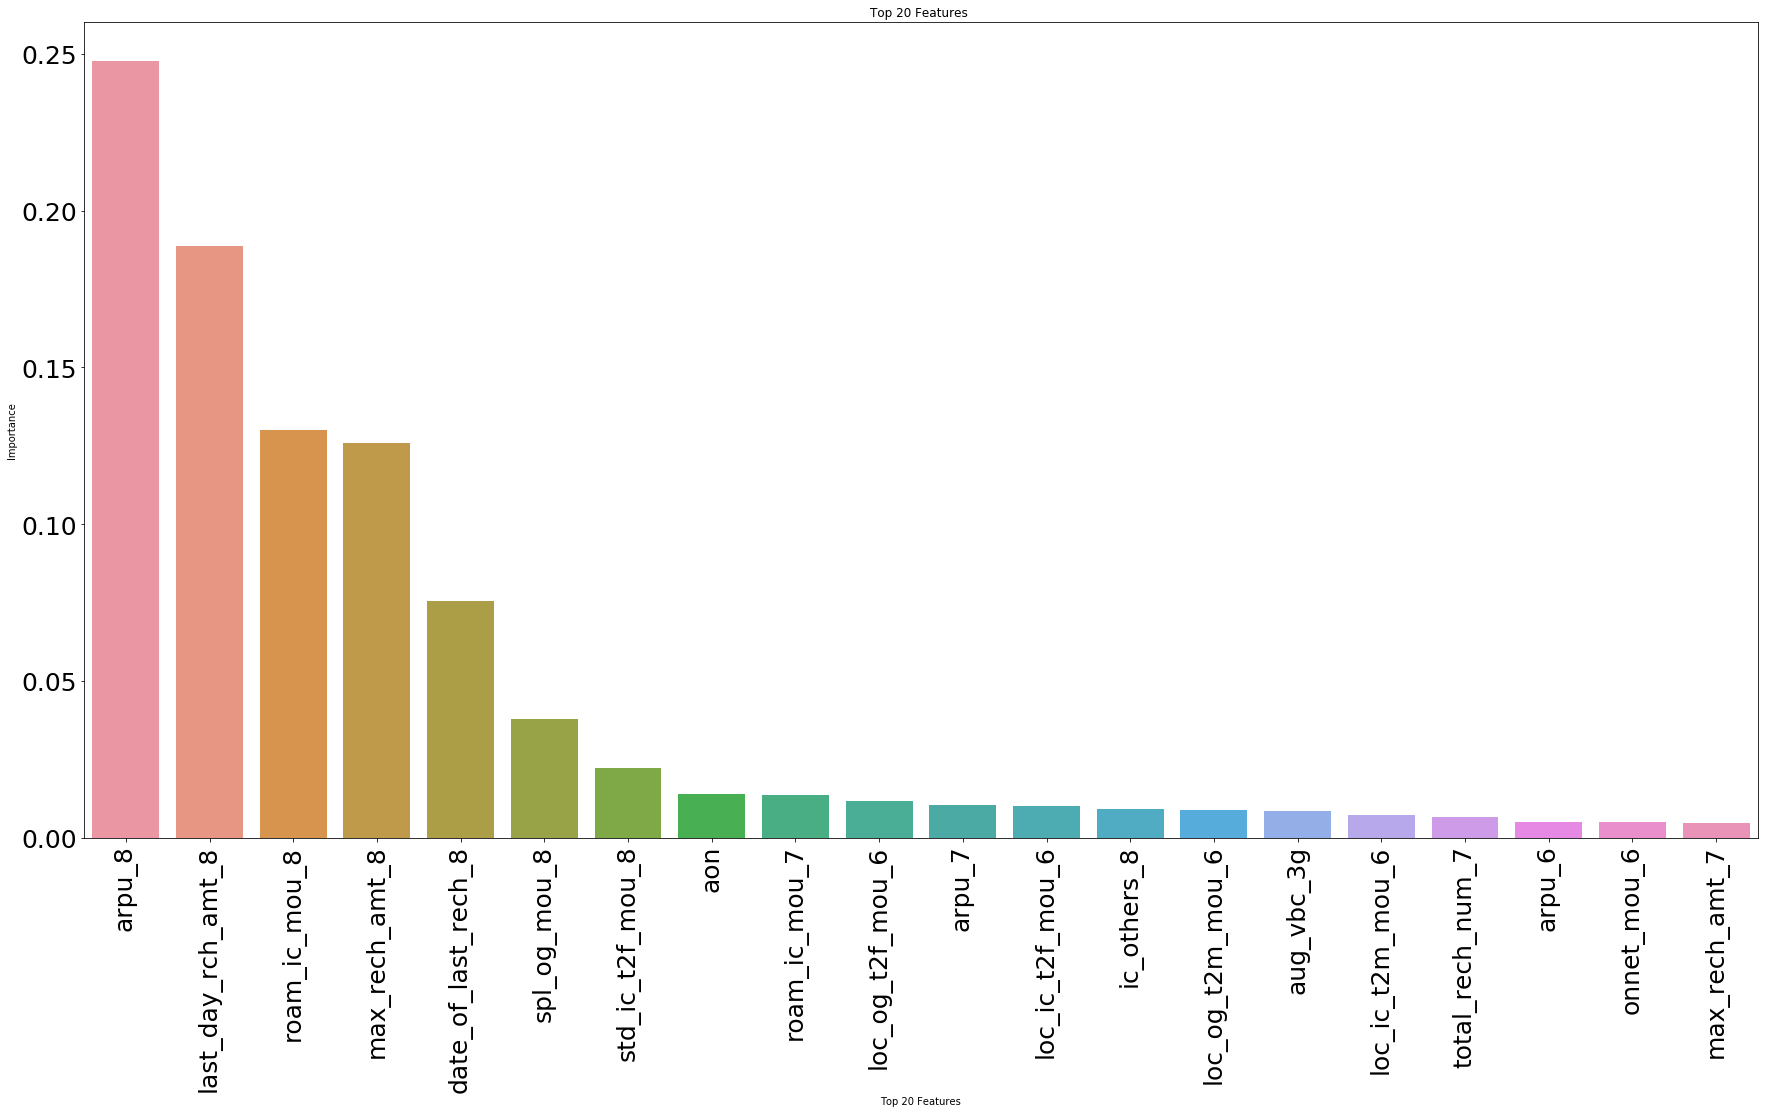

In [202]:
imp=rfc_final.feature_importances_
names=X_train.columns.values
imp,names=zip(*sorted(zip(imp,names)))

df_1=pd.DataFrame({"Variable":names,"importance":imp})
df_2 = df_1.sort_values(by="importance",axis=0,ascending=False)
df_2 = df_2.reset_index(drop=True)

plt.figure(figsize=(30, 15))
plt.xticks(rotation = 90)
plt.xticks(size = 25)
plt.yticks(size = 25)

ax = sns.barplot(x='Variable', y= 'importance', data=df_2[0:20])
ax.set(xlabel = 'Top 20 Features', ylabel = 'Importance')
plt.title("Top 20 Features ")
plt.show()

# Distribution of Arpu across months

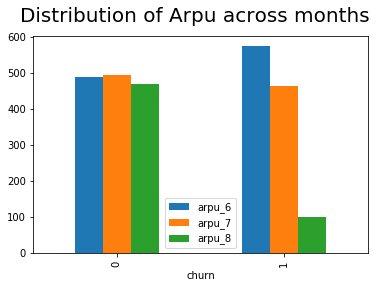

In [203]:
telecom_high_value['churn'] = telecom_high_value['churn'].astype('object', copy = False)
df_sample = telecom_high_value.groupby(['churn'])['arpu_6', 'arpu_7', 'arpu_8'].median()
df_sample.plot.bar()
plt.suptitle('Distribution of Arpu across months', fontsize=20)
plt.show()




# Average Incoming Call for August - Roaming trend across months

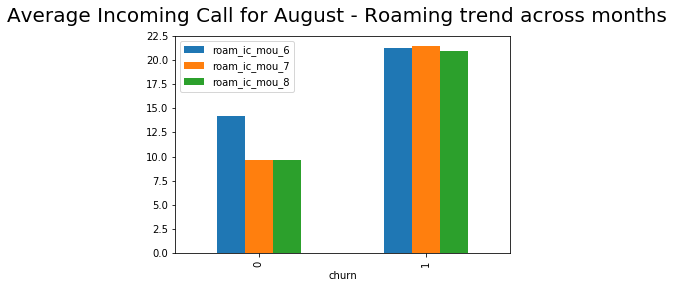

In [204]:
df_sample = telecom_high_value.groupby(['churn'])['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('Average Incoming Call for August - Roaming trend across months', fontsize=20)
plt.show()

# Maximum Recharge Amount

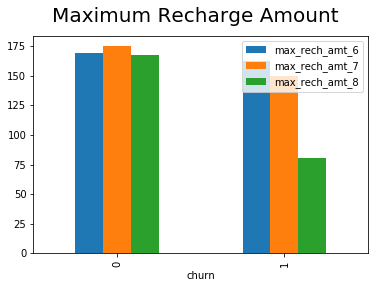

In [205]:
df_sample = telecom_high_value.groupby(['churn'])['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'].mean()
df_sample.plot.bar()
plt.suptitle('Maximum Recharge Amount', fontsize=20)
plt.show()

# Special Outgoing Call trend across months

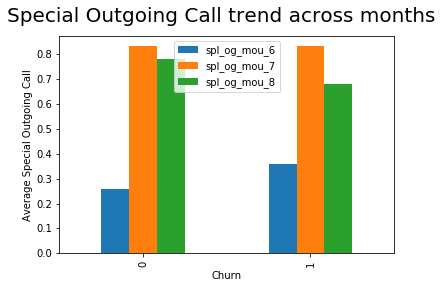

In [206]:
df_sample = telecom_high_value.groupby(['churn'])['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8'].median()
df_sample.plot.bar()
plt.suptitle('Special Outgoing Call trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average Special Outgoing Call")
plt.show()

# STD income Call trend across months

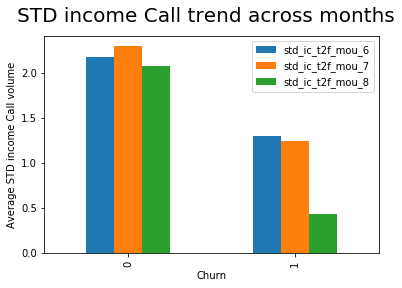

In [207]:
df_sample = telecom_high_value.groupby(['churn'])['std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('STD income Call trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average STD income Call volume")
plt.show()

# Incoming call to Other trend across months

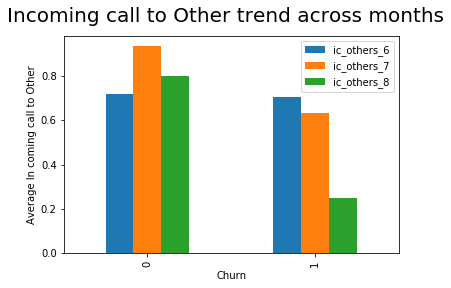

In [208]:
df_sample = telecom_high_value.groupby(['churn'])['ic_others_6', 'ic_others_7', 'ic_others_8'].mean()
df_sample.plot.bar()
plt.suptitle('Incoming call to Other trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average In coming call to Other")
plt.show()

# Recommending Strategies to manage customer churn :


1. ARPU 7th and 8th - Average Revenue Per User decreases from 6th to 7th month, then from 7th to 8th month as most of the users are churned by 8th month.

2. date_of_last_rech_8 - Most of the Users are churned between 25th to 31st of the month. Hence providing offers prior to 25th can reduce the churn. We can send out periodic offers to customers between 15th of the month to 25th of the month so as to reduce the churn of customers.

3. last_day_rch_amt_8 - Lower the last day recharge amount higher the churn rate. Focus on customers whose last day recharge amount has decreased. Specially for customers without any recharge amount.

4. roam_ic_mou_8 - Higher the incoming roaming amount, higher is the churn rate. Focus on customers whose incoming roaming amount has increased, because they are likely to churn.

5. std_ic_t2f_mou_8 - Lower the STD incoming call, higher is the churn rate. Focus on customers whose STD incoming call amount has decreased for that month.

# Business Insights

- Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using   services from a roaming zone.

- The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.

- To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers.